# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
import muse_inference
from muse_inference import MuseProblem
import numpy as np

In [3]:
θ_true = 1.

## With numpy

### Scalar

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = prob.solve(0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▉         | 93/1010 [00:00<00:00, 921.29it/s]

 18%|█▊        | 186/1010 [00:00<00:00, 868.05it/s]

 27%|██▋       | 276/1010 [00:00<00:00, 877.97it/s]

 36%|███▋      | 368/1010 [00:00<00:00, 891.33it/s]

 46%|████▌     | 461/1010 [00:00<00:00, 902.92it/s]

 55%|█████▍    | 554/1010 [00:00<00:00, 909.81it/s]

 64%|██████▍   | 646/1010 [00:00<00:00, 910.81it/s]

 73%|███████▎  | 739/1010 [00:00<00:00, 913.63it/s]

 82%|████████▏ | 831/1010 [00:00<00:00, 910.89it/s]

100%|██████████| 1010/1010 [00:01<00:00, 1006.01it/s]

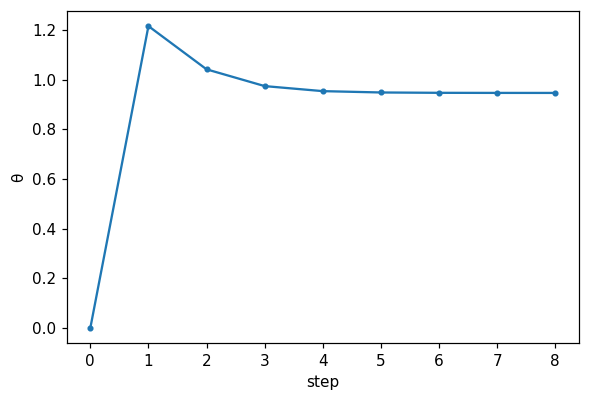

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [8]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        (θ1, θ2) = θ
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ((x1,x2), (z1,z2))
    
    def gradθ_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        return (np.sum(z1**2)/(2*np.exp(θ1)) - self.N/2, np.sum(z2**2)/(2*np.exp(θ2)) - self.N/2)
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        logLike = -(np.sum((x1 - z1)**2) + np.sum(z1**2) / np.exp(θ1) + 512*θ1) / 2 -(np.sum((x2 - z2)**2) + np.sum(z2**2) / np.exp(θ2) + 512*θ2) / 2
        gradz_logLike = (x1 - z1 * (1 + np.exp(-θ1)), x2 - z2 * (1 + np.exp(-θ2)))
        return (logLike, gradz_logLike)
    
    def gradθ_and_hessθ_logPrior(self, θ):
        (θ1, θ2) = θ
        g = (-θ1/(3**2), -θ2/(3**2))
        H = ((-1/3**2, 0),
              (0,      -1/3**2))
        return g, H

In [9]:
prob = NumpyFunnelMuseProblem(2048)
θ = (-1., 5.)
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [10]:
result = prob.solve(θ, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  1%|          | 9/1010 [00:00<00:11, 85.07it/s]

  2%|▏         | 25/1010 [00:00<00:07, 125.08it/s]

  4%|▍         | 41/1010 [00:00<00:07, 137.34it/s]

  6%|▌         | 57/1010 [00:00<00:06, 143.76it/s]

  7%|▋         | 72/1010 [00:00<00:07, 128.16it/s]

  9%|▊         | 88/1010 [00:00<00:06, 135.94it/s]

 10%|█         | 102/1010 [00:00<00:07, 127.53it/s]

 12%|█▏        | 118/1010 [00:00<00:06, 136.53it/s]

 13%|█▎        | 132/1010 [00:01<00:06, 126.42it/s]

 15%|█▍        | 149/1010 [00:01<00:06, 136.84it/s]

 16%|█▋        | 166/1010 [00:01<00:05, 145.17it/s]

 18%|█▊        | 181/1010 [00:01<00:06, 132.09it/s]

 20%|█▉        | 198/1010 [00:01<00:05, 140.33it/s]

 21%|██        | 213/1010 [00:01<00:06, 122.08it/s]

 23%|██▎       | 230/1010 [00:01<00:05, 133.46it/s]

 24%|██▍       | 244/1010 [00:01<00:06, 126.94it/s]

 26%|██▌       | 262/1010 [00:01<00:05, 140.36it/s]

 28%|██▊       | 280/1010 [00:02<00:04, 150.48it/s]

 29%|██▉       | 296/1010 [00:02<00:05, 138.90it/s]

 31%|███       | 311/1010 [00:02<00:05, 136.14it/s]

 33%|███▎      | 330/1010 [00:02<00:04, 148.52it/s]

 34%|███▍      | 346/1010 [00:02<00:04, 137.59it/s]

 36%|███▌      | 364/1010 [00:02<00:04, 148.66it/s]

 38%|███▊      | 380/1010 [00:02<00:04, 139.15it/s]

 40%|███▉      | 399/1010 [00:02<00:04, 150.67it/s]

 41%|████      | 415/1010 [00:03<00:04, 129.95it/s]

 43%|████▎     | 433/1010 [00:03<00:04, 141.54it/s]

 45%|████▍     | 451/1010 [00:03<00:03, 150.84it/s]

 46%|████▌     | 467/1010 [00:03<00:03, 136.86it/s]

 48%|████▊     | 485/1010 [00:03<00:03, 146.71it/s]

 50%|████▉     | 503/1010 [00:03<00:03, 154.28it/s]

 51%|█████▏    | 519/1010 [00:03<00:03, 128.44it/s]

 53%|█████▎    | 537/1010 [00:03<00:03, 140.98it/s]

 55%|█████▍    | 553/1010 [00:04<00:03, 128.54it/s]

 57%|█████▋    | 571/1010 [00:04<00:03, 140.55it/s]

 58%|█████▊    | 586/1010 [00:04<00:03, 129.29it/s]

 60%|█████▉    | 604/1010 [00:04<00:02, 141.40it/s]

 61%|██████▏   | 619/1010 [00:04<00:02, 138.86it/s]

 63%|██████▎   | 636/1010 [00:04<00:02, 131.35it/s]

 65%|██████▍   | 655/1010 [00:04<00:02, 144.77it/s]

 67%|██████▋   | 674/1010 [00:04<00:02, 155.77it/s]

 68%|██████▊   | 691/1010 [00:05<00:02, 142.12it/s]

 70%|███████   | 708/1010 [00:05<00:02, 138.82it/s]

 72%|███████▏  | 723/1010 [00:05<00:02, 126.05it/s]

 73%|███████▎  | 742/1010 [00:05<00:02, 124.57it/s]

 75%|███████▌  | 761/1010 [00:05<00:01, 138.91it/s]

 77%|███████▋  | 780/1010 [00:05<00:01, 150.70it/s]

 79%|███████▉  | 799/1010 [00:05<00:01, 160.16it/s]

 81%|████████  | 816/1010 [00:05<00:01, 133.54it/s]

 83%|████████▎ | 835/1010 [00:06<00:01, 145.57it/s]

 84%|████████▍ | 851/1010 [00:06<00:01, 134.54it/s]

 86%|████████▌ | 870/1010 [00:06<00:00, 147.19it/s]

 88%|████████▊ | 887/1010 [00:06<00:00, 135.77it/s]

 90%|████████▉ | 906/1010 [00:06<00:00, 147.52it/s]

 91%|█████████▏| 922/1010 [00:06<00:00, 126.18it/s]

 93%|█████████▎| 941/1010 [00:06<00:00, 140.24it/s]

 95%|█████████▌| 960/1010 [00:06<00:00, 151.48it/s]

 97%|█████████▋| 977/1010 [00:07<00:00, 139.50it/s]

 99%|█████████▊| 995/1010 [00:07<00:00, 148.68it/s]

100%|██████████| 1010/1010 [00:07<00:00, 139.38it/s]

In [11]:
result.history[-1]["θ"]

(-1.0629377565878193, 4.9796990924522655)

## With Jax

In [12]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem, JaxMuseProblem

### Scalar

In [13]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (jnp.array(x), jnp.array(z))

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)

In [14]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [15]:
result = prob.solve(0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<33:12,  1.97s/it]

  1%|          | 9/1010 [00:02<02:52,  5.82it/s]

  2%|▏         | 16/1010 [00:02<01:27, 11.40it/s]

  2%|▏         | 25/1010 [00:02<00:49, 19.86it/s]

  3%|▎         | 34/1010 [00:02<00:33, 28.98it/s]

  4%|▍         | 43/1010 [00:02<00:25, 38.22it/s]

  5%|▌         | 52/1010 [00:02<00:20, 46.88it/s]

  6%|▌         | 61/1010 [00:02<00:17, 54.83it/s]

  7%|▋         | 70/1010 [00:02<00:15, 61.95it/s]

  8%|▊         | 79/1010 [00:02<00:14, 65.33it/s]

  9%|▊         | 88/1010 [00:03<00:13, 69.57it/s]

 10%|▉         | 97/1010 [00:03<00:12, 73.60it/s]

 10%|█         | 106/1010 [00:05<01:21, 11.13it/s]

 11%|█▏        | 115/1010 [00:05<00:59, 15.10it/s]

 12%|█▏        | 123/1010 [00:05<00:45, 19.45it/s]

 13%|█▎        | 132/1010 [00:05<00:34, 25.47it/s]

 14%|█▍        | 141/1010 [00:05<00:26, 32.33it/s]

 15%|█▍        | 150/1010 [00:06<00:21, 39.58it/s]

 16%|█▌        | 158/1010 [00:06<00:18, 45.47it/s]

 16%|█▋        | 166/1010 [00:06<00:16, 51.74it/s]

 17%|█▋        | 175/1010 [00:06<00:14, 58.21it/s]

 18%|█▊        | 184/1010 [00:06<00:12, 63.77it/s]

 19%|█▉        | 192/1010 [00:06<00:12, 66.63it/s]

 20%|█▉        | 201/1010 [00:06<00:11, 70.22it/s]

 21%|██        | 209/1010 [00:07<00:19, 40.85it/s]

 21%|██▏       | 217/1010 [00:07<00:16, 47.27it/s]

 22%|██▏       | 226/1010 [00:07<00:14, 54.77it/s]

 23%|██▎       | 235/1010 [00:07<00:12, 61.03it/s]

 24%|██▍       | 244/1010 [00:07<00:11, 66.73it/s]

 25%|██▌       | 253/1010 [00:07<00:10, 71.58it/s]

 26%|██▌       | 262/1010 [00:07<00:09, 74.90it/s]

 27%|██▋       | 271/1010 [00:07<00:09, 76.61it/s]

 28%|██▊       | 280/1010 [00:08<00:09, 78.92it/s]

 29%|██▊       | 289/1010 [00:08<00:08, 80.40it/s]

 30%|██▉       | 298/1010 [00:08<00:08, 81.27it/s]

 30%|███       | 307/1010 [00:08<00:09, 70.36it/s]

 32%|███▏      | 319/1010 [00:08<00:08, 82.52it/s]

 33%|███▎      | 331/1010 [00:08<00:07, 92.29it/s]

 34%|███▍      | 344/1010 [00:08<00:06, 101.46it/s]

 35%|███▌      | 357/1010 [00:08<00:06, 107.29it/s]

 37%|███▋      | 369/1010 [00:08<00:05, 110.61it/s]

 38%|███▊      | 382/1010 [00:09<00:05, 113.88it/s]

 39%|███▉      | 394/1010 [00:09<00:05, 114.44it/s]

 40%|████      | 406/1010 [00:09<00:06, 95.73it/s] 

 41%|████▏     | 419/1010 [00:09<00:05, 102.43it/s]

 43%|████▎     | 432/1010 [00:09<00:05, 108.00it/s]

 44%|████▍     | 444/1010 [00:09<00:05, 108.58it/s]

 45%|████▌     | 457/1010 [00:09<00:04, 112.09it/s]

 47%|████▋     | 470/1010 [00:09<00:04, 115.15it/s]

 48%|████▊     | 482/1010 [00:09<00:04, 113.52it/s]

 49%|████▉     | 494/1010 [00:10<00:04, 111.09it/s]

 50%|█████     | 506/1010 [00:10<00:05, 95.81it/s] 

 51%|█████▏    | 518/1010 [00:10<00:04, 101.64it/s]

 53%|█████▎    | 531/1010 [00:10<00:04, 107.82it/s]

 54%|█████▍    | 544/1010 [00:10<00:04, 112.64it/s]

 55%|█████▌    | 557/1010 [00:10<00:03, 116.03it/s]

 56%|█████▋    | 570/1010 [00:10<00:03, 118.74it/s]

 58%|█████▊    | 583/1010 [00:10<00:03, 120.58it/s]

 59%|█████▉    | 596/1010 [00:10<00:03, 122.33it/s]

 60%|██████    | 609/1010 [00:11<00:03, 102.29it/s]

 62%|██████▏   | 622/1010 [00:11<00:03, 107.40it/s]

 63%|██████▎   | 635/1010 [00:11<00:03, 111.39it/s]

 64%|██████▍   | 648/1010 [00:11<00:03, 113.50it/s]

 65%|██████▌   | 660/1010 [00:11<00:03, 114.45it/s]

 67%|██████▋   | 672/1010 [00:11<00:02, 113.14it/s]

 68%|██████▊   | 684/1010 [00:11<00:02, 114.58it/s]

 69%|██████▉   | 696/1010 [00:11<00:02, 115.79it/s]

 70%|███████   | 708/1010 [00:12<00:03, 95.78it/s] 

 71%|███████   | 719/1010 [00:12<00:02, 98.09it/s]

 72%|███████▏  | 731/1010 [00:12<00:02, 102.50it/s]

 74%|███████▎  | 744/1010 [00:12<00:02, 108.64it/s]

 75%|███████▍  | 757/1010 [00:12<00:02, 112.79it/s]

 76%|███████▌  | 769/1010 [00:12<00:02, 114.11it/s]

 77%|███████▋  | 782/1010 [00:12<00:01, 117.84it/s]

 79%|███████▊  | 795/1010 [00:12<00:01, 119.81it/s]

 80%|████████  | 808/1010 [00:12<00:01, 120.49it/s]

 81%|████████▏ | 821/1010 [00:13<00:02, 84.60it/s] 

 82%|████████▏ | 831/1010 [00:13<00:02, 78.71it/s]

 83%|████████▎ | 840/1010 [00:13<00:02, 74.27it/s]

 84%|████████▍ | 849/1010 [00:13<00:02, 77.65it/s]

 85%|████████▌ | 861/1010 [00:13<00:01, 87.74it/s]

 87%|████████▋ | 874/1010 [00:13<00:01, 97.73it/s]

 88%|████████▊ | 887/1010 [00:13<00:01, 104.63it/s]

 89%|████████▉ | 899/1010 [00:13<00:01, 108.60it/s]

 90%|█████████ | 911/1010 [00:14<00:01, 94.60it/s] 

 92%|█████████▏| 925/1010 [00:14<00:00, 104.79it/s]

 93%|█████████▎| 938/1010 [00:14<00:00, 110.43it/s]

 94%|█████████▍| 951/1010 [00:14<00:00, 113.33it/s]

 96%|█████████▌| 965/1010 [00:14<00:00, 118.72it/s]

 97%|█████████▋| 978/1010 [00:14<00:00, 120.26it/s]

 98%|█████████▊| 991/1010 [00:14<00:00, 122.54it/s]

100%|█████████▉| 1005/1010 [00:14<00:00, 126.63it/s]

100%|██████████| 1010/1010 [00:14<00:00, 67.83it/s] 

In [16]:
[h["θ"] for h in result.history]

[0.0,
 DeviceArray(1.2127951, dtype=float32),
 DeviceArray(1.0396029, dtype=float32),
 DeviceArray(0.97261405, dtype=float32),
 DeviceArray(0.952539, dtype=float32),
 DeviceArray(0.94721234, dtype=float32),
 DeviceArray(0.94585395, dtype=float32),
 DeviceArray(0.94551116, dtype=float32),
 DeviceArray(0.94534713, dtype=float32),
 DeviceArray(0.9453871, dtype=float32)]

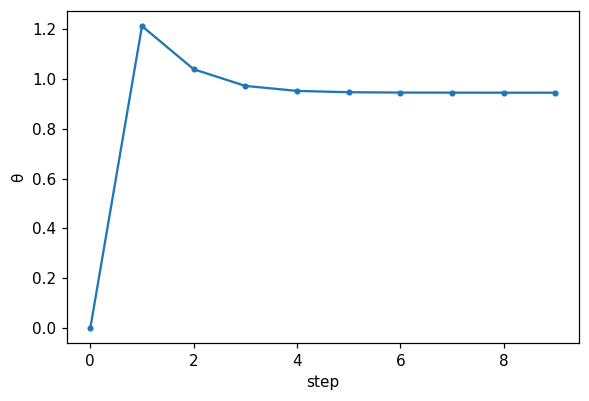

In [17]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [18]:
class JaxFunnelMuseProblem(muse_inference.jax.JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        (θ1, θ2) = (θ["θ1"], θ["θ2"])
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ({"x1":x1, "x2":x2}, {"z1":z1, "z2":z2})

    def logLike(self, x, z, θ):
        return (
            -(jnp.sum((x["x1"] - z["z1"])**2) + jnp.sum(z["z1"]**2) / jnp.exp(θ["θ1"]) + 512*θ["θ1"]) / 2
            -(jnp.sum((x["x2"] - z["z2"])**2) + jnp.sum(z["z2"]**2) / jnp.exp(θ["θ2"]) + 512*θ["θ2"]) / 2
        )
    
    def logPrior(self, θ):
        return -θ["θ1"]**2 / (2*3**2) - θ["θ2"]**2 / (2*3**2)

In [19]:
prob = JaxFunnelMuseProblem(512)
θ = {"θ1":1., "θ2":2.}
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [20]:
result = prob.solve(θ, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<43:59,  2.62s/it]

  0%|          | 2/1010 [00:02<19:30,  1.16s/it]

  0%|          | 3/1010 [00:02<11:39,  1.44it/s]

  0%|          | 4/1010 [00:03<07:57,  2.11it/s]

  0%|          | 5/1010 [00:03<05:54,  2.84it/s]

  1%|          | 6/1010 [00:03<04:41,  3.57it/s]

  1%|          | 7/1010 [00:03<03:54,  4.27it/s]

  1%|          | 8/1010 [00:03<03:25,  4.87it/s]

  1%|          | 9/1010 [00:03<03:05,  5.39it/s]

  1%|          | 10/1010 [00:03<02:53,  5.75it/s]

  1%|          | 11/1010 [00:04<02:44,  6.06it/s]

  1%|          | 12/1010 [00:04<02:36,  6.39it/s]

  1%|▏         | 13/1010 [00:04<02:31,  6.60it/s]

  1%|▏         | 14/1010 [00:04<02:27,  6.76it/s]

  1%|▏         | 15/1010 [00:04<02:23,  6.93it/s]

  2%|▏         | 16/1010 [00:04<02:22,  6.97it/s]

  2%|▏         | 17/1010 [00:04<02:22,  6.99it/s]

  2%|▏         | 18/1010 [00:05<02:21,  7.01it/s]

  2%|▏         | 19/1010 [00:05<02:22,  6.96it/s]

  2%|▏         | 20/1010 [00:05<02:21,  6.98it/s]

  2%|▏         | 21/1010 [00:05<02:21,  7.01it/s]

  2%|▏         | 22/1010 [00:05<02:19,  7.10it/s]

  2%|▏         | 23/1010 [00:05<02:18,  7.15it/s]

  2%|▏         | 24/1010 [00:05<02:18,  7.13it/s]

  2%|▏         | 25/1010 [00:05<02:18,  7.13it/s]

  3%|▎         | 26/1010 [00:06<02:18,  7.10it/s]

  3%|▎         | 27/1010 [00:06<02:19,  7.05it/s]

  3%|▎         | 28/1010 [00:06<02:19,  7.03it/s]

  3%|▎         | 29/1010 [00:06<02:20,  6.98it/s]

  3%|▎         | 30/1010 [00:06<02:19,  7.01it/s]

  3%|▎         | 31/1010 [00:06<02:19,  7.02it/s]

  3%|▎         | 32/1010 [00:06<02:19,  6.99it/s]

  3%|▎         | 33/1010 [00:07<02:18,  7.05it/s]

  3%|▎         | 34/1010 [00:07<02:17,  7.12it/s]

  3%|▎         | 35/1010 [00:07<02:12,  7.34it/s]

  4%|▎         | 36/1010 [00:07<02:09,  7.53it/s]

  4%|▎         | 37/1010 [00:07<02:07,  7.60it/s]

  4%|▍         | 38/1010 [00:07<02:09,  7.53it/s]

  4%|▍         | 39/1010 [00:07<02:09,  7.50it/s]

  4%|▍         | 40/1010 [00:08<02:08,  7.54it/s]

  4%|▍         | 41/1010 [00:08<02:08,  7.55it/s]

  4%|▍         | 42/1010 [00:08<02:07,  7.58it/s]

  4%|▍         | 43/1010 [00:08<02:07,  7.56it/s]

  4%|▍         | 44/1010 [00:08<02:06,  7.61it/s]

  4%|▍         | 45/1010 [00:08<02:07,  7.54it/s]

  5%|▍         | 46/1010 [00:08<02:07,  7.53it/s]

  5%|▍         | 47/1010 [00:08<02:07,  7.57it/s]

  5%|▍         | 48/1010 [00:09<02:06,  7.62it/s]

  5%|▍         | 49/1010 [00:09<02:05,  7.64it/s]

  5%|▍         | 50/1010 [00:09<02:05,  7.65it/s]

  5%|▌         | 51/1010 [00:09<02:05,  7.61it/s]

  5%|▌         | 52/1010 [00:09<02:06,  7.59it/s]

  5%|▌         | 53/1010 [00:09<02:04,  7.66it/s]

  5%|▌         | 54/1010 [00:09<02:05,  7.60it/s]

  5%|▌         | 55/1010 [00:10<02:05,  7.63it/s]

  6%|▌         | 56/1010 [00:10<02:05,  7.62it/s]

  6%|▌         | 57/1010 [00:10<02:04,  7.66it/s]

  6%|▌         | 58/1010 [00:10<02:04,  7.62it/s]

  6%|▌         | 59/1010 [00:10<02:05,  7.60it/s]

  6%|▌         | 60/1010 [00:10<02:04,  7.66it/s]

  6%|▌         | 61/1010 [00:10<02:03,  7.71it/s]

  6%|▌         | 62/1010 [00:10<02:05,  7.54it/s]

  6%|▌         | 63/1010 [00:11<02:03,  7.66it/s]

  6%|▋         | 64/1010 [00:11<02:05,  7.53it/s]

  6%|▋         | 65/1010 [00:11<02:04,  7.59it/s]

  7%|▋         | 66/1010 [00:11<02:03,  7.63it/s]

  7%|▋         | 67/1010 [00:11<02:02,  7.70it/s]

  7%|▋         | 68/1010 [00:11<02:01,  7.75it/s]

  7%|▋         | 69/1010 [00:11<02:01,  7.76it/s]

  7%|▋         | 70/1010 [00:11<02:01,  7.72it/s]

  7%|▋         | 71/1010 [00:12<02:01,  7.74it/s]

  7%|▋         | 72/1010 [00:12<02:01,  7.74it/s]

  7%|▋         | 73/1010 [00:12<02:01,  7.74it/s]

  7%|▋         | 74/1010 [00:12<01:59,  7.80it/s]

  7%|▋         | 75/1010 [00:12<02:00,  7.78it/s]

  8%|▊         | 76/1010 [00:12<02:00,  7.78it/s]

  8%|▊         | 77/1010 [00:12<01:59,  7.80it/s]

  8%|▊         | 78/1010 [00:13<01:59,  7.80it/s]

  8%|▊         | 79/1010 [00:13<01:59,  7.79it/s]

  8%|▊         | 80/1010 [00:13<01:59,  7.81it/s]

  8%|▊         | 81/1010 [00:13<01:59,  7.75it/s]

  8%|▊         | 82/1010 [00:13<01:58,  7.84it/s]

  8%|▊         | 83/1010 [00:13<01:59,  7.74it/s]

  8%|▊         | 84/1010 [00:13<01:59,  7.72it/s]

  8%|▊         | 85/1010 [00:13<01:59,  7.73it/s]

  9%|▊         | 86/1010 [00:14<01:59,  7.73it/s]

  9%|▊         | 87/1010 [00:14<01:58,  7.77it/s]

  9%|▊         | 88/1010 [00:14<01:57,  7.85it/s]

  9%|▉         | 89/1010 [00:14<01:57,  7.83it/s]

  9%|▉         | 90/1010 [00:14<01:57,  7.84it/s]

  9%|▉         | 91/1010 [00:14<01:57,  7.82it/s]

  9%|▉         | 92/1010 [00:14<01:58,  7.73it/s]

  9%|▉         | 93/1010 [00:14<01:59,  7.65it/s]

  9%|▉         | 94/1010 [00:15<01:58,  7.73it/s]

  9%|▉         | 95/1010 [00:15<01:57,  7.76it/s]

 10%|▉         | 96/1010 [00:15<01:56,  7.86it/s]

 10%|▉         | 97/1010 [00:15<01:56,  7.84it/s]

 10%|▉         | 98/1010 [00:15<01:56,  7.83it/s]

 10%|▉         | 99/1010 [00:15<01:55,  7.88it/s]

 10%|▉         | 100/1010 [00:15<01:56,  7.82it/s]

 10%|█         | 101/1010 [00:15<01:56,  7.79it/s]

 10%|█         | 102/1010 [00:18<14:55,  1.01it/s]

 10%|█         | 103/1010 [00:19<10:54,  1.38it/s]

 10%|█         | 104/1010 [00:19<08:06,  1.86it/s]

 10%|█         | 105/1010 [00:19<06:07,  2.46it/s]

 10%|█         | 106/1010 [00:19<04:44,  3.17it/s]

 11%|█         | 107/1010 [00:19<03:46,  3.99it/s]

 11%|█         | 108/1010 [00:19<03:05,  4.87it/s]

 11%|█         | 109/1010 [00:19<02:37,  5.73it/s]

 11%|█         | 110/1010 [00:19<02:17,  6.53it/s]

 11%|█         | 111/1010 [00:19<02:04,  7.22it/s]

 11%|█         | 112/1010 [00:19<01:54,  7.83it/s]

 11%|█         | 113/1010 [00:20<01:48,  8.24it/s]

 11%|█▏        | 114/1010 [00:20<01:44,  8.59it/s]

 11%|█▏        | 115/1010 [00:20<01:41,  8.85it/s]

 11%|█▏        | 116/1010 [00:20<01:39,  8.97it/s]

 12%|█▏        | 117/1010 [00:20<01:38,  9.05it/s]

 12%|█▏        | 118/1010 [00:20<01:37,  9.14it/s]

 12%|█▏        | 119/1010 [00:20<01:36,  9.26it/s]

 12%|█▏        | 120/1010 [00:20<01:36,  9.21it/s]

 12%|█▏        | 121/1010 [00:20<01:35,  9.32it/s]

 12%|█▏        | 122/1010 [00:21<01:34,  9.44it/s]

 12%|█▏        | 123/1010 [00:21<01:34,  9.42it/s]

 12%|█▏        | 124/1010 [00:21<01:35,  9.31it/s]

 12%|█▏        | 125/1010 [00:21<01:34,  9.37it/s]

 12%|█▏        | 126/1010 [00:21<01:33,  9.43it/s]

 13%|█▎        | 127/1010 [00:21<01:33,  9.47it/s]

 13%|█▎        | 128/1010 [00:21<01:33,  9.42it/s]

 13%|█▎        | 129/1010 [00:21<01:34,  9.37it/s]

 13%|█▎        | 130/1010 [00:21<01:34,  9.34it/s]

 13%|█▎        | 131/1010 [00:21<01:33,  9.38it/s]

 13%|█▎        | 132/1010 [00:22<01:34,  9.27it/s]

 13%|█▎        | 133/1010 [00:22<01:34,  9.26it/s]

 13%|█▎        | 134/1010 [00:22<01:33,  9.35it/s]

 13%|█▎        | 135/1010 [00:22<01:33,  9.38it/s]

 13%|█▎        | 136/1010 [00:22<01:31,  9.53it/s]

 14%|█▎        | 137/1010 [00:22<01:31,  9.56it/s]

 14%|█▎        | 138/1010 [00:22<01:31,  9.51it/s]

 14%|█▍        | 140/1010 [00:22<01:29,  9.74it/s]

 14%|█▍        | 141/1010 [00:23<01:30,  9.60it/s]

 14%|█▍        | 142/1010 [00:23<01:30,  9.58it/s]

 14%|█▍        | 143/1010 [00:23<01:31,  9.48it/s]

 14%|█▍        | 144/1010 [00:23<01:31,  9.50it/s]

 14%|█▍        | 145/1010 [00:23<01:30,  9.55it/s]

 14%|█▍        | 146/1010 [00:23<01:30,  9.60it/s]

 15%|█▍        | 147/1010 [00:23<01:30,  9.57it/s]

 15%|█▍        | 148/1010 [00:23<01:30,  9.58it/s]

 15%|█▍        | 149/1010 [00:23<01:29,  9.65it/s]

 15%|█▍        | 150/1010 [00:23<01:28,  9.73it/s]

 15%|█▍        | 151/1010 [00:24<01:28,  9.74it/s]

 15%|█▌        | 152/1010 [00:24<01:27,  9.76it/s]

 15%|█▌        | 153/1010 [00:24<01:28,  9.73it/s]

 15%|█▌        | 154/1010 [00:24<01:28,  9.72it/s]

 15%|█▌        | 155/1010 [00:24<01:27,  9.79it/s]

 15%|█▌        | 156/1010 [00:24<01:26,  9.82it/s]

 16%|█▌        | 157/1010 [00:24<01:27,  9.75it/s]

 16%|█▌        | 158/1010 [00:24<01:27,  9.71it/s]

 16%|█▌        | 159/1010 [00:24<01:28,  9.66it/s]

 16%|█▌        | 160/1010 [00:25<01:28,  9.65it/s]

 16%|█▌        | 161/1010 [00:25<01:27,  9.70it/s]

 16%|█▌        | 162/1010 [00:25<01:27,  9.68it/s]

 16%|█▌        | 163/1010 [00:25<01:27,  9.67it/s]

 16%|█▌        | 164/1010 [00:25<01:27,  9.62it/s]

 16%|█▋        | 165/1010 [00:25<01:28,  9.60it/s]

 16%|█▋        | 166/1010 [00:25<01:28,  9.54it/s]

 17%|█▋        | 167/1010 [00:25<01:28,  9.48it/s]

 17%|█▋        | 168/1010 [00:25<01:31,  9.19it/s]

 17%|█▋        | 169/1010 [00:25<01:32,  9.10it/s]

 17%|█▋        | 170/1010 [00:26<01:33,  8.95it/s]

 17%|█▋        | 171/1010 [00:26<01:33,  8.96it/s]

 17%|█▋        | 172/1010 [00:26<01:34,  8.89it/s]

 17%|█▋        | 173/1010 [00:26<01:34,  8.90it/s]

 17%|█▋        | 174/1010 [00:26<01:33,  8.95it/s]

 17%|█▋        | 175/1010 [00:26<01:32,  9.01it/s]

 17%|█▋        | 176/1010 [00:26<01:31,  9.10it/s]

 18%|█▊        | 177/1010 [00:26<01:30,  9.20it/s]

 18%|█▊        | 178/1010 [00:26<01:30,  9.20it/s]

 18%|█▊        | 179/1010 [00:27<01:30,  9.15it/s]

 18%|█▊        | 180/1010 [00:27<01:30,  9.19it/s]

 18%|█▊        | 181/1010 [00:27<01:29,  9.21it/s]

 18%|█▊        | 182/1010 [00:27<01:30,  9.13it/s]

 18%|█▊        | 183/1010 [00:27<01:30,  9.18it/s]

 18%|█▊        | 184/1010 [00:27<01:29,  9.27it/s]

 18%|█▊        | 185/1010 [00:27<01:28,  9.32it/s]

 18%|█▊        | 186/1010 [00:27<01:28,  9.35it/s]

 19%|█▊        | 187/1010 [00:27<01:28,  9.35it/s]

 19%|█▊        | 188/1010 [00:28<01:27,  9.41it/s]

 19%|█▊        | 189/1010 [00:28<01:26,  9.48it/s]

 19%|█▉        | 191/1010 [00:28<01:24,  9.72it/s]

 19%|█▉        | 192/1010 [00:28<01:24,  9.71it/s]

 19%|█▉        | 193/1010 [00:28<01:24,  9.69it/s]

 19%|█▉        | 194/1010 [00:28<01:24,  9.70it/s]

 19%|█▉        | 195/1010 [00:28<01:24,  9.62it/s]

 20%|█▉        | 197/1010 [00:28<01:22,  9.80it/s]

 20%|█▉        | 198/1010 [00:29<01:22,  9.80it/s]

 20%|█▉        | 199/1010 [00:29<01:24,  9.64it/s]

 20%|█▉        | 200/1010 [00:29<01:24,  9.54it/s]

 20%|█▉        | 201/1010 [00:29<01:25,  9.42it/s]

 20%|██        | 202/1010 [00:29<01:25,  9.46it/s]

 20%|██        | 203/1010 [00:29<02:37,  5.12it/s]

 20%|██        | 204/1010 [00:30<02:17,  5.87it/s]

 20%|██        | 205/1010 [00:30<02:02,  6.56it/s]

 20%|██        | 206/1010 [00:30<01:53,  7.11it/s]

 20%|██        | 207/1010 [00:30<01:44,  7.68it/s]

 21%|██        | 208/1010 [00:30<01:39,  8.08it/s]

 21%|██        | 209/1010 [00:30<01:36,  8.34it/s]

 21%|██        | 210/1010 [00:30<01:32,  8.68it/s]

 21%|██        | 211/1010 [00:30<01:28,  9.03it/s]

 21%|██        | 212/1010 [00:30<01:26,  9.18it/s]

 21%|██        | 213/1010 [00:30<01:25,  9.31it/s]

 21%|██        | 214/1010 [00:31<01:24,  9.46it/s]

 21%|██▏       | 215/1010 [00:31<01:23,  9.53it/s]

 21%|██▏       | 216/1010 [00:31<01:23,  9.54it/s]

 21%|██▏       | 217/1010 [00:31<01:22,  9.60it/s]

 22%|██▏       | 218/1010 [00:31<01:22,  9.62it/s]

 22%|██▏       | 219/1010 [00:31<01:22,  9.55it/s]

 22%|██▏       | 220/1010 [00:31<01:22,  9.57it/s]

 22%|██▏       | 221/1010 [00:31<01:22,  9.52it/s]

 22%|██▏       | 222/1010 [00:31<01:23,  9.47it/s]

 22%|██▏       | 223/1010 [00:32<01:23,  9.48it/s]

 22%|██▏       | 224/1010 [00:32<01:21,  9.61it/s]

 22%|██▏       | 225/1010 [00:32<01:22,  9.52it/s]

 22%|██▏       | 226/1010 [00:32<01:22,  9.46it/s]

 22%|██▏       | 227/1010 [00:32<01:22,  9.44it/s]

 23%|██▎       | 228/1010 [00:32<01:22,  9.48it/s]

 23%|██▎       | 229/1010 [00:32<01:23,  9.37it/s]

 23%|██▎       | 230/1010 [00:32<01:23,  9.33it/s]

 23%|██▎       | 231/1010 [00:32<01:23,  9.33it/s]

 23%|██▎       | 232/1010 [00:32<01:23,  9.37it/s]

 23%|██▎       | 233/1010 [00:33<01:22,  9.45it/s]

 23%|██▎       | 234/1010 [00:33<01:21,  9.50it/s]

 23%|██▎       | 235/1010 [00:33<01:21,  9.51it/s]

 23%|██▎       | 236/1010 [00:33<01:21,  9.54it/s]

 23%|██▎       | 237/1010 [00:33<01:20,  9.65it/s]

 24%|██▎       | 238/1010 [00:33<01:20,  9.62it/s]

 24%|██▎       | 239/1010 [00:33<01:20,  9.60it/s]

 24%|██▍       | 240/1010 [00:33<01:19,  9.63it/s]

 24%|██▍       | 241/1010 [00:33<01:19,  9.67it/s]

 24%|██▍       | 242/1010 [00:34<01:19,  9.67it/s]

 24%|██▍       | 243/1010 [00:34<01:19,  9.68it/s]

 24%|██▍       | 244/1010 [00:34<01:19,  9.67it/s]

 24%|██▍       | 245/1010 [00:34<01:18,  9.76it/s]

 24%|██▍       | 246/1010 [00:34<01:18,  9.70it/s]

 24%|██▍       | 247/1010 [00:34<01:18,  9.70it/s]

 25%|██▍       | 248/1010 [00:34<01:19,  9.61it/s]

 25%|██▍       | 249/1010 [00:34<01:19,  9.56it/s]

 25%|██▍       | 250/1010 [00:34<01:19,  9.59it/s]

 25%|██▍       | 251/1010 [00:34<01:19,  9.57it/s]

 25%|██▍       | 252/1010 [00:35<01:19,  9.55it/s]

 25%|██▌       | 253/1010 [00:35<01:18,  9.59it/s]

 25%|██▌       | 254/1010 [00:35<01:18,  9.57it/s]

 25%|██▌       | 256/1010 [00:35<01:17,  9.74it/s]

 25%|██▌       | 257/1010 [00:35<01:16,  9.78it/s]

 26%|██▌       | 258/1010 [00:35<01:17,  9.70it/s]

 26%|██▌       | 259/1010 [00:35<01:18,  9.57it/s]

 26%|██▌       | 260/1010 [00:35<01:18,  9.52it/s]

 26%|██▌       | 261/1010 [00:35<01:17,  9.63it/s]

 26%|██▌       | 262/1010 [00:36<01:17,  9.64it/s]

 26%|██▌       | 263/1010 [00:36<01:17,  9.66it/s]

 26%|██▌       | 264/1010 [00:36<01:18,  9.53it/s]

 26%|██▌       | 265/1010 [00:36<01:18,  9.54it/s]

 26%|██▋       | 266/1010 [00:36<01:17,  9.58it/s]

 26%|██▋       | 267/1010 [00:36<01:16,  9.66it/s]

 27%|██▋       | 268/1010 [00:36<01:16,  9.71it/s]

 27%|██▋       | 269/1010 [00:36<01:16,  9.64it/s]

 27%|██▋       | 270/1010 [00:36<01:16,  9.62it/s]

 27%|██▋       | 271/1010 [00:37<01:17,  9.58it/s]

 27%|██▋       | 272/1010 [00:37<01:17,  9.54it/s]

 27%|██▋       | 273/1010 [00:37<01:17,  9.47it/s]

 27%|██▋       | 274/1010 [00:37<01:17,  9.48it/s]

 27%|██▋       | 275/1010 [00:37<01:17,  9.48it/s]

 27%|██▋       | 276/1010 [00:37<01:17,  9.45it/s]

 27%|██▋       | 277/1010 [00:37<01:17,  9.46it/s]

 28%|██▊       | 278/1010 [00:37<01:18,  9.36it/s]

 28%|██▊       | 279/1010 [00:37<01:19,  9.25it/s]

 28%|██▊       | 280/1010 [00:37<01:18,  9.34it/s]

 28%|██▊       | 281/1010 [00:38<01:17,  9.38it/s]

 28%|██▊       | 282/1010 [00:38<01:17,  9.42it/s]

 28%|██▊       | 283/1010 [00:38<01:16,  9.49it/s]

 28%|██▊       | 284/1010 [00:38<01:15,  9.56it/s]

 28%|██▊       | 285/1010 [00:38<01:16,  9.43it/s]

 28%|██▊       | 286/1010 [00:38<01:22,  8.79it/s]

 28%|██▊       | 287/1010 [00:38<01:21,  8.92it/s]

 29%|██▊       | 288/1010 [00:38<01:20,  8.98it/s]

 29%|██▊       | 289/1010 [00:38<01:19,  9.03it/s]

 29%|██▊       | 290/1010 [00:39<01:20,  8.92it/s]

 29%|██▉       | 291/1010 [00:39<01:19,  9.01it/s]

 29%|██▉       | 292/1010 [00:39<01:18,  9.10it/s]

 29%|██▉       | 293/1010 [00:39<01:18,  9.13it/s]

 29%|██▉       | 294/1010 [00:39<01:17,  9.29it/s]

 29%|██▉       | 295/1010 [00:39<01:16,  9.32it/s]

 29%|██▉       | 296/1010 [00:39<01:16,  9.37it/s]

 29%|██▉       | 297/1010 [00:39<01:15,  9.43it/s]

 30%|██▉       | 298/1010 [00:39<01:14,  9.51it/s]

 30%|██▉       | 299/1010 [00:40<01:14,  9.49it/s]

 30%|██▉       | 300/1010 [00:40<01:15,  9.41it/s]

 30%|██▉       | 301/1010 [00:40<01:16,  9.29it/s]

 30%|███       | 303/1010 [00:40<01:12,  9.76it/s]

 30%|███       | 304/1010 [00:40<01:18,  9.02it/s]

 30%|███       | 306/1010 [00:40<01:14,  9.50it/s]

 30%|███       | 307/1010 [00:40<01:14,  9.43it/s]

 30%|███       | 308/1010 [00:41<01:14,  9.39it/s]

 31%|███       | 309/1010 [00:41<01:15,  9.27it/s]

 31%|███       | 310/1010 [00:41<01:15,  9.32it/s]

 31%|███       | 311/1010 [00:41<01:16,  9.13it/s]

 31%|███       | 312/1010 [00:41<01:16,  9.12it/s]

 31%|███       | 313/1010 [00:41<01:15,  9.18it/s]

 31%|███       | 314/1010 [00:41<01:15,  9.18it/s]

 31%|███       | 315/1010 [00:41<01:16,  9.10it/s]

 31%|███▏      | 316/1010 [00:41<01:17,  9.00it/s]

 31%|███▏      | 317/1010 [00:42<01:17,  8.94it/s]

 31%|███▏      | 318/1010 [00:42<01:16,  9.00it/s]

 32%|███▏      | 319/1010 [00:42<01:17,  8.93it/s]

 32%|███▏      | 320/1010 [00:42<01:18,  8.81it/s]

 32%|███▏      | 321/1010 [00:42<01:18,  8.78it/s]

 32%|███▏      | 322/1010 [00:42<01:18,  8.77it/s]

 32%|███▏      | 323/1010 [00:42<01:18,  8.72it/s]

 32%|███▏      | 324/1010 [00:42<01:19,  8.68it/s]

 32%|███▏      | 325/1010 [00:42<01:18,  8.67it/s]

 32%|███▏      | 326/1010 [00:43<01:18,  8.75it/s]

 32%|███▏      | 327/1010 [00:43<01:18,  8.71it/s]

 32%|███▏      | 328/1010 [00:43<01:17,  8.78it/s]

 33%|███▎      | 329/1010 [00:43<01:17,  8.74it/s]

 33%|███▎      | 330/1010 [00:43<01:18,  8.69it/s]

 33%|███▎      | 331/1010 [00:43<01:19,  8.55it/s]

 33%|███▎      | 332/1010 [00:43<01:18,  8.60it/s]

 33%|███▎      | 333/1010 [00:43<01:18,  8.60it/s]

 33%|███▎      | 334/1010 [00:43<01:17,  8.67it/s]

 33%|███▎      | 335/1010 [00:44<01:17,  8.75it/s]

 33%|███▎      | 336/1010 [00:44<01:16,  8.76it/s]

 33%|███▎      | 337/1010 [00:44<01:16,  8.76it/s]

 33%|███▎      | 338/1010 [00:44<01:16,  8.78it/s]

 34%|███▎      | 339/1010 [00:44<01:16,  8.80it/s]

 34%|███▎      | 340/1010 [00:44<01:15,  8.85it/s]

 34%|███▍      | 341/1010 [00:44<01:15,  8.82it/s]

 34%|███▍      | 342/1010 [00:44<01:15,  8.79it/s]

 34%|███▍      | 343/1010 [00:44<01:15,  8.84it/s]

 34%|███▍      | 344/1010 [00:45<01:15,  8.87it/s]

 34%|███▍      | 345/1010 [00:45<01:14,  8.93it/s]

 34%|███▍      | 346/1010 [00:45<01:14,  8.89it/s]

 34%|███▍      | 347/1010 [00:45<01:14,  8.91it/s]

 34%|███▍      | 348/1010 [00:45<01:13,  8.96it/s]

 35%|███▍      | 349/1010 [00:45<01:13,  9.00it/s]

 35%|███▍      | 350/1010 [00:45<01:13,  8.97it/s]

 35%|███▍      | 351/1010 [00:45<01:13,  8.94it/s]

 35%|███▍      | 352/1010 [00:45<01:14,  8.86it/s]

 35%|███▍      | 353/1010 [00:46<01:14,  8.88it/s]

 35%|███▌      | 354/1010 [00:46<01:13,  8.96it/s]

 35%|███▌      | 356/1010 [00:46<01:08,  9.59it/s]

 35%|███▌      | 357/1010 [00:46<01:08,  9.52it/s]

 35%|███▌      | 358/1010 [00:46<01:09,  9.42it/s]

 36%|███▌      | 359/1010 [00:46<01:09,  9.42it/s]

 36%|███▌      | 360/1010 [00:46<01:09,  9.31it/s]

 36%|███▌      | 361/1010 [00:46<01:10,  9.23it/s]

 36%|███▌      | 362/1010 [00:47<01:11,  9.04it/s]

 36%|███▌      | 363/1010 [00:47<01:11,  9.02it/s]

 36%|███▌      | 364/1010 [00:47<01:12,  8.89it/s]

 36%|███▌      | 365/1010 [00:47<01:14,  8.71it/s]

 36%|███▌      | 366/1010 [00:47<01:14,  8.69it/s]

 36%|███▋      | 367/1010 [00:47<01:14,  8.58it/s]

 36%|███▋      | 368/1010 [00:47<01:15,  8.53it/s]

 37%|███▋      | 369/1010 [00:47<01:15,  8.52it/s]

 37%|███▋      | 370/1010 [00:48<01:15,  8.42it/s]

 37%|███▋      | 371/1010 [00:48<01:15,  8.43it/s]

 37%|███▋      | 372/1010 [00:48<01:15,  8.50it/s]

 37%|███▋      | 373/1010 [00:48<01:14,  8.55it/s]

 37%|███▋      | 374/1010 [00:48<01:13,  8.66it/s]

 37%|███▋      | 375/1010 [00:48<01:12,  8.75it/s]

 37%|███▋      | 376/1010 [00:48<01:11,  8.85it/s]

 37%|███▋      | 377/1010 [00:48<01:11,  8.82it/s]

 37%|███▋      | 378/1010 [00:48<01:11,  8.87it/s]

 38%|███▊      | 379/1010 [00:49<01:11,  8.85it/s]

 38%|███▊      | 380/1010 [00:49<01:11,  8.86it/s]

 38%|███▊      | 381/1010 [00:49<01:10,  8.88it/s]

 38%|███▊      | 382/1010 [00:49<01:10,  8.87it/s]

 38%|███▊      | 383/1010 [00:49<01:11,  8.81it/s]

 38%|███▊      | 384/1010 [00:49<01:11,  8.79it/s]

 38%|███▊      | 385/1010 [00:49<01:10,  8.85it/s]

 38%|███▊      | 386/1010 [00:49<01:11,  8.69it/s]

 38%|███▊      | 387/1010 [00:49<01:11,  8.71it/s]

 38%|███▊      | 388/1010 [00:50<01:12,  8.60it/s]

 39%|███▊      | 389/1010 [00:50<01:12,  8.60it/s]

 39%|███▊      | 390/1010 [00:50<01:12,  8.59it/s]

 39%|███▊      | 391/1010 [00:50<01:11,  8.65it/s]

 39%|███▉      | 392/1010 [00:50<01:10,  8.74it/s]

 39%|███▉      | 393/1010 [00:50<01:10,  8.78it/s]

 39%|███▉      | 394/1010 [00:50<01:10,  8.79it/s]

 39%|███▉      | 395/1010 [00:50<01:09,  8.79it/s]

 39%|███▉      | 396/1010 [00:50<01:09,  8.78it/s]

 39%|███▉      | 397/1010 [00:51<01:10,  8.73it/s]

 39%|███▉      | 398/1010 [00:51<01:10,  8.74it/s]

 40%|███▉      | 399/1010 [00:51<01:10,  8.68it/s]

 40%|███▉      | 400/1010 [00:51<01:10,  8.66it/s]

 40%|███▉      | 401/1010 [00:51<01:09,  8.77it/s]

 40%|███▉      | 402/1010 [00:51<01:09,  8.80it/s]

 40%|███▉      | 403/1010 [00:51<01:08,  8.85it/s]

 40%|████      | 404/1010 [00:51<01:08,  8.87it/s]

 40%|████      | 405/1010 [00:51<01:06,  9.12it/s]

 40%|████      | 407/1010 [00:52<00:59, 10.16it/s]

 40%|████      | 409/1010 [00:52<00:56, 10.61it/s]

 41%|████      | 411/1010 [00:52<00:55, 10.82it/s]

 41%|████      | 413/1010 [00:52<00:53, 11.19it/s]

 41%|████      | 415/1010 [00:52<00:52, 11.32it/s]

 41%|████▏     | 417/1010 [00:53<00:51, 11.62it/s]

 41%|████▏     | 419/1010 [00:53<00:50, 11.73it/s]

 42%|████▏     | 421/1010 [00:53<00:49, 11.85it/s]

 42%|████▏     | 423/1010 [00:53<00:49, 11.80it/s]

 42%|████▏     | 425/1010 [00:53<00:49, 11.80it/s]

 42%|████▏     | 427/1010 [00:53<00:49, 11.72it/s]

 42%|████▏     | 429/1010 [00:54<00:48, 11.89it/s]

 43%|████▎     | 431/1010 [00:54<00:48, 11.93it/s]

 43%|████▎     | 433/1010 [00:54<00:48, 11.99it/s]

 43%|████▎     | 435/1010 [00:54<00:48, 11.96it/s]

 43%|████▎     | 437/1010 [00:54<00:48, 11.72it/s]

 43%|████▎     | 439/1010 [00:54<00:48, 11.73it/s]

 44%|████▎     | 441/1010 [00:55<00:48, 11.68it/s]

 44%|████▍     | 443/1010 [00:55<00:48, 11.69it/s]

 44%|████▍     | 445/1010 [00:55<00:48, 11.70it/s]

 44%|████▍     | 447/1010 [00:55<00:47, 11.82it/s]

 44%|████▍     | 449/1010 [00:55<00:47, 11.75it/s]

 45%|████▍     | 451/1010 [00:55<00:47, 11.66it/s]

 45%|████▍     | 453/1010 [00:56<00:47, 11.62it/s]

 45%|████▌     | 455/1010 [00:56<00:48, 11.54it/s]

 45%|████▌     | 457/1010 [00:56<00:49, 11.10it/s]

 45%|████▌     | 459/1010 [00:56<00:49, 11.16it/s]

 46%|████▌     | 461/1010 [00:56<00:49, 11.16it/s]

 46%|████▌     | 463/1010 [00:56<00:49, 11.16it/s]

 46%|████▌     | 465/1010 [00:57<00:48, 11.31it/s]

 46%|████▌     | 467/1010 [00:57<00:47, 11.46it/s]

 46%|████▋     | 469/1010 [00:57<00:48, 11.26it/s]

 47%|████▋     | 471/1010 [00:57<00:47, 11.30it/s]

 47%|████▋     | 473/1010 [00:57<00:47, 11.28it/s]

 47%|████▋     | 475/1010 [00:58<00:47, 11.28it/s]

 47%|████▋     | 477/1010 [00:58<00:46, 11.41it/s]

 47%|████▋     | 479/1010 [00:58<00:46, 11.48it/s]

 48%|████▊     | 481/1010 [00:58<00:46, 11.31it/s]

 48%|████▊     | 483/1010 [00:58<00:46, 11.45it/s]

 48%|████▊     | 485/1010 [00:58<00:45, 11.47it/s]

 48%|████▊     | 487/1010 [00:59<00:45, 11.38it/s]

 48%|████▊     | 489/1010 [00:59<00:46, 11.19it/s]

 49%|████▊     | 491/1010 [00:59<00:46, 11.10it/s]

 49%|████▉     | 493/1010 [00:59<00:49, 10.36it/s]

 49%|████▉     | 495/1010 [00:59<00:49, 10.36it/s]

 49%|████▉     | 497/1010 [01:00<00:51,  9.95it/s]

 49%|████▉     | 499/1010 [01:00<00:50, 10.15it/s]

 50%|████▉     | 501/1010 [01:00<00:49, 10.36it/s]

 50%|████▉     | 503/1010 [01:00<00:48, 10.38it/s]

 50%|█████     | 505/1010 [01:00<00:47, 10.56it/s]

 50%|█████     | 507/1010 [01:00<00:45, 10.95it/s]

 50%|█████     | 509/1010 [01:01<00:41, 12.04it/s]

 51%|█████     | 511/1010 [01:01<00:38, 13.12it/s]

 51%|█████     | 513/1010 [01:01<00:35, 14.13it/s]

 51%|█████     | 515/1010 [01:01<00:34, 14.53it/s]

 51%|█████     | 517/1010 [01:01<00:32, 15.24it/s]

 51%|█████▏    | 519/1010 [01:01<00:30, 16.01it/s]

 52%|█████▏    | 521/1010 [01:01<00:32, 15.27it/s]

 52%|█████▏    | 523/1010 [01:01<00:32, 15.03it/s]

 52%|█████▏    | 525/1010 [01:02<00:30, 15.72it/s]

 52%|█████▏    | 527/1010 [01:02<00:30, 15.75it/s]

 52%|█████▏    | 529/1010 [01:02<00:29, 16.16it/s]

 53%|█████▎    | 531/1010 [01:02<00:29, 16.45it/s]

 53%|█████▎    | 533/1010 [01:02<00:30, 15.43it/s]

 53%|█████▎    | 535/1010 [01:02<00:29, 15.93it/s]

 53%|█████▎    | 537/1010 [01:02<00:28, 16.42it/s]

 53%|█████▎    | 539/1010 [01:02<00:28, 16.56it/s]

 54%|█████▎    | 541/1010 [01:03<00:27, 16.96it/s]

 54%|█████▍    | 543/1010 [01:03<00:30, 15.16it/s]

 54%|█████▍    | 545/1010 [01:03<00:29, 15.53it/s]

 54%|█████▍    | 547/1010 [01:03<00:28, 16.03it/s]

 54%|█████▍    | 549/1010 [01:03<00:28, 16.44it/s]

 55%|█████▍    | 551/1010 [01:03<00:28, 16.34it/s]

 55%|█████▍    | 553/1010 [01:03<00:27, 16.68it/s]

 55%|█████▍    | 555/1010 [01:03<00:27, 16.46it/s]

 55%|█████▌    | 557/1010 [01:04<00:29, 15.19it/s]

 55%|█████▌    | 559/1010 [01:04<00:30, 14.60it/s]

 56%|█████▌    | 561/1010 [01:04<00:29, 15.09it/s]

 56%|█████▌    | 563/1010 [01:04<00:29, 15.32it/s]

 56%|█████▌    | 565/1010 [01:04<00:27, 15.92it/s]

 56%|█████▌    | 567/1010 [01:04<00:27, 16.32it/s]

 56%|█████▋    | 569/1010 [01:04<00:27, 16.24it/s]

 57%|█████▋    | 571/1010 [01:04<00:26, 16.56it/s]

 57%|█████▋    | 573/1010 [01:05<00:27, 15.90it/s]

 57%|█████▋    | 575/1010 [01:05<00:27, 16.02it/s]

 57%|█████▋    | 577/1010 [01:05<00:27, 15.96it/s]

 57%|█████▋    | 579/1010 [01:05<00:29, 14.79it/s]

 58%|█████▊    | 581/1010 [01:05<00:29, 14.46it/s]

 58%|█████▊    | 583/1010 [01:05<00:28, 14.91it/s]

 58%|█████▊    | 585/1010 [01:05<00:29, 14.33it/s]

 58%|█████▊    | 587/1010 [01:06<00:28, 14.91it/s]

 58%|█████▊    | 589/1010 [01:06<00:27, 15.24it/s]

 59%|█████▊    | 591/1010 [01:06<00:26, 15.55it/s]

 59%|█████▊    | 593/1010 [01:06<00:26, 15.57it/s]

 59%|█████▉    | 595/1010 [01:06<00:25, 15.98it/s]

 59%|█████▉    | 597/1010 [01:06<00:25, 16.24it/s]

 59%|█████▉    | 599/1010 [01:06<00:25, 16.44it/s]

 60%|█████▉    | 601/1010 [01:06<00:24, 16.70it/s]

 60%|█████▉    | 603/1010 [01:07<00:26, 15.24it/s]

 60%|█████▉    | 605/1010 [01:07<00:25, 15.64it/s]

 60%|██████    | 607/1010 [01:07<00:27, 14.63it/s]

 60%|██████    | 609/1010 [01:07<00:26, 15.32it/s]

 60%|██████    | 611/1010 [01:07<00:25, 15.91it/s]

 61%|██████    | 613/1010 [01:07<00:24, 16.36it/s]

 61%|██████    | 615/1010 [01:07<00:23, 16.76it/s]

 61%|██████    | 617/1010 [01:07<00:22, 17.20it/s]

 61%|██████▏   | 619/1010 [01:08<00:22, 17.41it/s]

 61%|██████▏   | 621/1010 [01:08<00:22, 17.51it/s]

 62%|██████▏   | 623/1010 [01:08<00:21, 17.62it/s]

 62%|██████▏   | 625/1010 [01:08<00:21, 17.64it/s]

 62%|██████▏   | 627/1010 [01:08<00:21, 17.47it/s]

 62%|██████▏   | 629/1010 [01:08<00:21, 17.68it/s]

 62%|██████▏   | 631/1010 [01:08<00:21, 17.77it/s]

 63%|██████▎   | 633/1010 [01:08<00:21, 17.44it/s]

 63%|██████▎   | 635/1010 [01:08<00:21, 17.52it/s]

 63%|██████▎   | 637/1010 [01:09<00:21, 17.57it/s]

 63%|██████▎   | 639/1010 [01:09<00:21, 17.29it/s]

 63%|██████▎   | 641/1010 [01:09<00:21, 17.22it/s]

 64%|██████▎   | 643/1010 [01:09<00:20, 17.60it/s]

 64%|██████▍   | 645/1010 [01:09<00:20, 17.82it/s]

 64%|██████▍   | 648/1010 [01:09<00:19, 18.60it/s]

 64%|██████▍   | 650/1010 [01:09<00:19, 18.45it/s]

 65%|██████▍   | 652/1010 [01:09<00:19, 18.01it/s]

 65%|██████▍   | 654/1010 [01:09<00:19, 18.05it/s]

 65%|██████▍   | 656/1010 [01:10<00:19, 17.72it/s]

 65%|██████▌   | 658/1010 [01:10<00:19, 17.75it/s]

 65%|██████▌   | 660/1010 [01:10<00:19, 17.92it/s]

 66%|██████▌   | 662/1010 [01:10<00:19, 18.05it/s]

 66%|██████▌   | 664/1010 [01:10<00:19, 17.64it/s]

 66%|██████▌   | 666/1010 [01:10<00:18, 18.11it/s]

 66%|██████▌   | 668/1010 [01:10<00:18, 18.33it/s]

 66%|██████▋   | 670/1010 [01:10<00:18, 18.32it/s]

 67%|██████▋   | 672/1010 [01:10<00:18, 18.01it/s]

 67%|██████▋   | 674/1010 [01:11<00:18, 18.22it/s]

 67%|██████▋   | 676/1010 [01:11<00:18, 18.36it/s]

 67%|██████▋   | 678/1010 [01:11<00:17, 18.57it/s]

 67%|██████▋   | 681/1010 [01:11<00:17, 19.29it/s]

 68%|██████▊   | 683/1010 [01:11<00:17, 19.14it/s]

 68%|██████▊   | 685/1010 [01:11<00:17, 18.92it/s]

 68%|██████▊   | 687/1010 [01:11<00:17, 18.26it/s]

 68%|██████▊   | 690/1010 [01:11<00:16, 19.48it/s]

 69%|██████▊   | 692/1010 [01:12<00:16, 19.13it/s]

 69%|██████▊   | 694/1010 [01:12<00:16, 18.96it/s]

 69%|██████▉   | 696/1010 [01:12<00:17, 18.30it/s]

 69%|██████▉   | 698/1010 [01:12<00:17, 18.14it/s]

 69%|██████▉   | 700/1010 [01:12<00:17, 18.12it/s]

 70%|██████▉   | 702/1010 [01:12<00:17, 18.06it/s]

 70%|██████▉   | 704/1010 [01:12<00:17, 17.76it/s]

 70%|███████   | 707/1010 [01:12<00:15, 19.28it/s]

 70%|███████   | 709/1010 [01:12<00:16, 18.05it/s]

 70%|███████   | 711/1010 [01:13<00:16, 17.62it/s]

 71%|███████   | 713/1010 [01:13<00:16, 17.76it/s]

 71%|███████   | 715/1010 [01:13<00:16, 17.98it/s]

 71%|███████   | 717/1010 [01:13<00:16, 17.75it/s]

 71%|███████   | 719/1010 [01:13<00:16, 17.78it/s]

 71%|███████▏  | 721/1010 [01:13<00:16, 17.92it/s]

 72%|███████▏  | 723/1010 [01:13<00:16, 17.49it/s]

 72%|███████▏  | 726/1010 [01:13<00:14, 20.26it/s]

 72%|███████▏  | 729/1010 [01:14<00:14, 19.17it/s]

 72%|███████▏  | 731/1010 [01:14<00:14, 19.02it/s]

 73%|███████▎  | 734/1010 [01:14<00:13, 21.04it/s]

 73%|███████▎  | 737/1010 [01:14<00:12, 21.50it/s]

 73%|███████▎  | 740/1010 [01:14<00:12, 21.29it/s]

 74%|███████▎  | 743/1010 [01:14<00:13, 20.20it/s]

 74%|███████▍  | 746/1010 [01:14<00:13, 19.40it/s]

 74%|███████▍  | 748/1010 [01:15<00:13, 19.10it/s]

 74%|███████▍  | 751/1010 [01:15<00:12, 21.16it/s]

 75%|███████▍  | 754/1010 [01:15<00:12, 21.31it/s]

 75%|███████▍  | 757/1010 [01:15<00:12, 20.36it/s]

 75%|███████▌  | 760/1010 [01:15<00:12, 19.54it/s]

 76%|███████▌  | 763/1010 [01:15<00:11, 21.28it/s]

 76%|███████▌  | 766/1010 [01:15<00:11, 20.36it/s]

 76%|███████▌  | 769/1010 [01:16<00:12, 19.56it/s]

 76%|███████▋  | 772/1010 [01:16<00:12, 19.27it/s]

 77%|███████▋  | 775/1010 [01:16<00:11, 19.86it/s]

 77%|███████▋  | 778/1010 [01:16<00:11, 19.68it/s]

 77%|███████▋  | 780/1010 [01:16<00:11, 19.38it/s]

 77%|███████▋  | 782/1010 [01:16<00:11, 19.17it/s]

 78%|███████▊  | 784/1010 [01:16<00:12, 18.81it/s]

 78%|███████▊  | 787/1010 [01:16<00:10, 21.26it/s]

 78%|███████▊  | 790/1010 [01:17<00:10, 21.21it/s]

 79%|███████▊  | 793/1010 [01:17<00:10, 20.15it/s]

 79%|███████▉  | 796/1010 [01:17<00:11, 19.05it/s]

 79%|███████▉  | 798/1010 [01:17<00:11, 18.72it/s]

 79%|███████▉  | 800/1010 [01:17<00:11, 18.47it/s]

 79%|███████▉  | 802/1010 [01:17<00:11, 18.36it/s]

 80%|███████▉  | 804/1010 [01:17<00:11, 17.74it/s]

 80%|███████▉  | 806/1010 [01:17<00:11, 17.84it/s]

 80%|████████  | 808/1010 [01:18<00:11, 17.85it/s]

 80%|████████  | 810/1010 [01:18<00:12, 16.06it/s]

 80%|████████  | 812/1010 [01:18<00:12, 16.40it/s]

 81%|████████  | 814/1010 [01:18<00:11, 17.09it/s]

 81%|████████  | 816/1010 [01:18<00:11, 17.54it/s]

 81%|████████  | 818/1010 [01:18<00:11, 17.26it/s]

 81%|████████  | 820/1010 [01:18<00:11, 17.27it/s]

 81%|████████▏ | 822/1010 [01:18<00:10, 17.70it/s]

 82%|████████▏ | 824/1010 [01:19<00:10, 17.82it/s]

 82%|████████▏ | 826/1010 [01:19<00:10, 17.53it/s]

 82%|████████▏ | 828/1010 [01:19<00:10, 17.72it/s]

 82%|████████▏ | 830/1010 [01:19<00:10, 17.71it/s]

 82%|████████▏ | 832/1010 [01:19<00:10, 17.52it/s]

 83%|████████▎ | 834/1010 [01:19<00:09, 17.75it/s]

 83%|████████▎ | 836/1010 [01:19<00:09, 17.82it/s]

 83%|████████▎ | 838/1010 [01:19<00:09, 17.87it/s]

 83%|████████▎ | 841/1010 [01:19<00:08, 20.05it/s]

 83%|████████▎ | 843/1010 [01:20<00:08, 19.65it/s]

 84%|████████▎ | 845/1010 [01:20<00:08, 19.02it/s]

 84%|████████▍ | 847/1010 [01:20<00:09, 17.56it/s]

 84%|████████▍ | 849/1010 [01:20<00:09, 17.53it/s]

 84%|████████▍ | 851/1010 [01:20<00:08, 17.89it/s]

 84%|████████▍ | 853/1010 [01:20<00:08, 17.79it/s]

 85%|████████▍ | 856/1010 [01:20<00:08, 18.78it/s]

 85%|████████▍ | 858/1010 [01:20<00:08, 18.43it/s]

 85%|████████▌ | 860/1010 [01:20<00:08, 18.35it/s]

 85%|████████▌ | 862/1010 [01:21<00:08, 18.28it/s]

 86%|████████▌ | 864/1010 [01:21<00:08, 17.95it/s]

 86%|████████▌ | 866/1010 [01:21<00:07, 18.08it/s]

 86%|████████▌ | 868/1010 [01:21<00:07, 18.37it/s]

 86%|████████▌ | 870/1010 [01:21<00:07, 18.19it/s]

 86%|████████▋ | 872/1010 [01:21<00:07, 18.18it/s]

 87%|████████▋ | 875/1010 [01:21<00:06, 19.61it/s]

 87%|████████▋ | 877/1010 [01:21<00:06, 19.37it/s]

 87%|████████▋ | 879/1010 [01:22<00:06, 19.04it/s]

 87%|████████▋ | 882/1010 [01:22<00:05, 21.49it/s]

 88%|████████▊ | 885/1010 [01:22<00:06, 20.58it/s]

 88%|████████▊ | 888/1010 [01:22<00:06, 19.12it/s]

 88%|████████▊ | 891/1010 [01:22<00:05, 21.27it/s]

 89%|████████▊ | 894/1010 [01:22<00:05, 20.58it/s]

 89%|████████▉ | 897/1010 [01:22<00:05, 19.84it/s]

 89%|████████▉ | 900/1010 [01:23<00:05, 19.59it/s]

 89%|████████▉ | 903/1010 [01:23<00:05, 20.36it/s]

 90%|████████▉ | 906/1010 [01:23<00:04, 20.81it/s]

 90%|█████████ | 909/1010 [01:23<00:05, 19.85it/s]

100%|██████████| 1010/1010 [01:23<00:00, 12.09it/s]

In [21]:
result.θ

{'θ1': DeviceArray(1.0922196, dtype=float32),
 'θ2': DeviceArray(1.9329984, dtype=float32)}

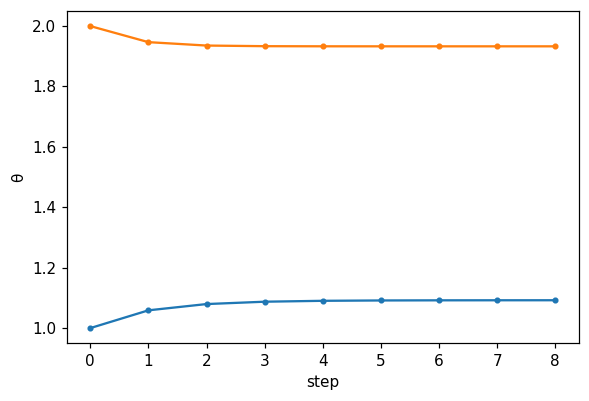

In [22]:
plt.plot([h["θ"]["θ1"] for h in result.history], ".-")
plt.plot([h["θ"]["θ2"] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [23]:
import sys
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

### Scalar

In [24]:
# define 
def gen_funnel(x=None, θ=None, rng_seeder=None):
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true, rng_seeder=rng)).prior.x[0,0]

# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [25]:
result = prob.solve(0., rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  7%|▋         | 75/1010 [00:00<00:01, 747.70it/s]

 15%|█▍        | 150/1010 [00:03<00:24, 34.45it/s]

 20%|██        | 203/1010 [00:07<00:35, 23.02it/s]

 28%|██▊       | 283/1010 [00:07<00:17, 40.58it/s]

 32%|███▏      | 326/1010 [00:11<00:27, 25.20it/s]

 40%|████      | 405/1010 [00:14<00:25, 23.54it/s]

 48%|████▊     | 484/1010 [00:14<00:14, 36.39it/s]

 52%|█████▏    | 523/1010 [00:18<00:20, 24.20it/s]

 60%|█████▉    | 604/1010 [00:18<00:10, 38.18it/s]

 64%|██████▍   | 648/1010 [00:22<00:14, 25.08it/s]

 70%|███████   | 708/1010 [00:26<00:14, 21.28it/s]

 78%|███████▊  | 790/1010 [00:26<00:06, 33.48it/s]

 82%|████████▏ | 830/1010 [00:30<00:07, 23.13it/s]

 90%|█████████ | 910/1010 [00:33<00:04, 22.26it/s]

 98%|█████████▊| 993/1010 [00:34<00:00, 34.01it/s]

100%|██████████| 1010/1010 [00:34<00:00, 29.67it/s]

In [26]:
[h["θ"] for h in result.history]

[0.0,
 array([1.30363499]),
 array([1.14695937]),
 array([1.07392309]),
 array([1.02450847]),
 array([1.02850517]),
 array([1.02980893]),
 array([1.03023694]),
 array([1.03037775]),
 array([1.0304241])]

/home/runner/.cache/pypoetry/virtualenvs/muse-inference-8TQ0v75b-py3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


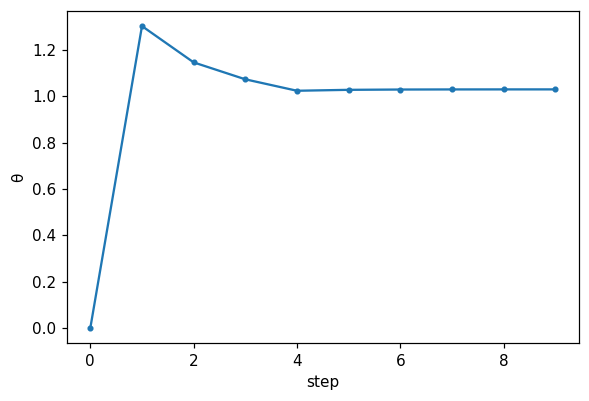

In [27]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [28]:
# define 
def gen_funnel(x=(None,None), θ=(None,None), rng_seeder=None, N=3):
    (α, β) = θ
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        α = pm.Normal("α", 0, 3) if α is None else α
        β = pm.Normal("β", 0, 3) if β is None else β
        z1 = pm.Normal("z1", 0, np.exp(α / 2), size=N)
        z2 = pm.Normal("z2", 0, np.exp(β / 2), size=N)
        x1 = pm.Normal("x1", z1, 1, observed=x[0])
        x2 = pm.Normal("x2", z2, 1, observed=x[1])
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
θ = (-1, 3)
prior = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ, rng_seeder=rng)).prior
x_obs = (prior.x1, prior.x2)

In [29]:
# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [30]:
result = prob.solve((0,0), α=0.3, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

 10%|█         | 102/1010 [00:09<01:25, 10.60it/s]

 20%|█▉        | 199/1010 [00:09<00:32, 24.64it/s]

 25%|██▌       | 257/1010 [00:19<01:01, 12.20it/s]

 30%|███       | 304/1010 [00:29<01:23,  8.43it/s]

 40%|████      | 405/1010 [00:39<01:07,  8.98it/s]

 50%|█████     | 506/1010 [00:49<00:53,  9.34it/s]

 60%|██████    | 607/1010 [00:59<00:41,  9.77it/s]

 70%|███████   | 708/1010 [01:09<00:30,  9.99it/s]

 80%|████████  | 809/1010 [01:18<00:19, 10.07it/s]

 90%|█████████ | 910/1010 [01:29<00:10,  9.95it/s]

100%|██████████| 1010/1010 [01:29<00:00, 11.28it/s]

In [31]:
[h["θ"] for h in result.history]

[(0, 0),
 (-0.2815542650152186, 6.477243065481232),
 (-0.5141747017993881, 6.117638105986346),
 (-0.6918288059307816, 5.771206936941405),
 (-0.8177009896792248, 5.439946228160347),
 (-0.9018400316593392, 5.126349650147274),
 (-0.9572251933169915, 4.833422582078036),
 (-0.9973477714739579, 4.564419027380707),
 (-1.0313059723290432, 4.322361248178538),
 (-1.0403874945099805, 4.1095482019757394)]

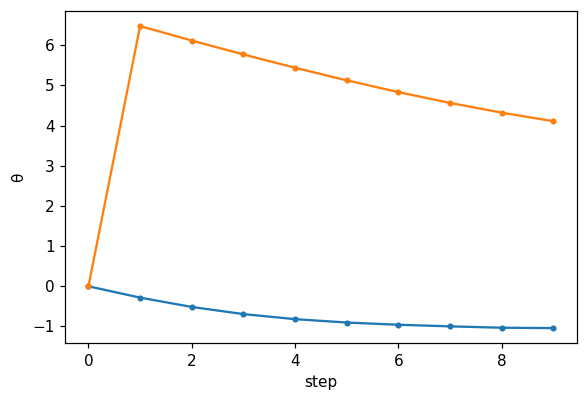

In [32]:
plt.plot([h["θ"][0] for h in result.history], ".-")
plt.plot([h["θ"][1] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");